## 가볍게 타이타닉 생존자 예측을 진행해보자

In [24]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from 

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

In [17]:
!pip install datawig

^C


In [2]:
data = pd.read_csv("titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# PassengerId  승객ID
# Survived  생존여부
# Pclass 사회경제적 지위(1에 가까울 수록 높음)
# Name 이름
# Sex 성
# Age 나이
# SibSp 동반한 Sibling(형제자매)와 Spouse(배우자)의 수
# Parch : 동반한 Parent(부모) Child(자식)의 수
# Ticket : 티켓의 고유넘버
# Fare : 티켓의 요금
# Cabin : 객실 번호
# Embarked : 승선한 항

In [6]:
# 일단 승객 ID, 티켓넘버, 이름은 제거
data.drop(["PassengerId", "Ticket", "Name"], axis = 1, inplace = True)

Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.663043  0.336957


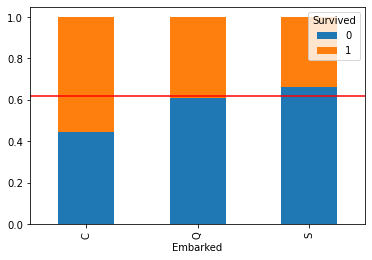

In [7]:
# Embarked도 상관없을 것으로 판단, 확인해보자

temp = pd.crosstab(data['Embarked'], data['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-data['Survived'].mean(), color = 'r')
plt.show()

In [8]:
import scipy.stats as spst
# 먼저 집계
table = pd.crosstab(data['Survived'], data['Embarked'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217
----------------------------------------------------------------------------------------------------
카이제곱통계량 26.48914983923762
p-value 1.769922284120912e-06
기대빈도
 [[103.7480315  47.5511811 397.7007874]
 [ 64.2519685  29.4488189 246.2992126]]


In [9]:
# 승선지역은 생존에 영향을 미치는 것으로 보인다.

#### 결측치 확인

In [10]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
# Cabin은 너무 많은 결측치가 존재한다. 제거하자.
data = data.drop("Cabin", axis = 1)

In [12]:
# Embarked의 결측치는 2개밖에 존재하지 않는다. 행단위로 제거하자.
data.dropna(axis = 0,subset = "Embarked", inplace = True)

In [13]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [19]:
# Age도 제거해보자
data.dropna(axis = 0,subset = "Age", inplace = True)

In [20]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 가변수화

In [25]:
columns = ["Sex", "Embarked","Pclass"]
data = pd.get_dummies(data, drop_first=True, columns=columns)

In [27]:
data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


### target 분리

In [28]:
target= "Survived"

x = data.drop(target, axis=1)
y = data[target]

In [29]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15)

In [30]:
x_train.shape

(605, 9)

### 딥러닝을 위한 콜백함수 선언

In [32]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss',
                  patience = 5,
                  min_delta = 0,
                  restore_best_weights=True)

### ANN

#### sequential

In [56]:
keras.backend.clear_session()

model = keras.models.Sequential([keras.layers.Input(shape = (9,)), keras.layers.Dense(64, activation = "relu"), keras.layers.Dense(1, activation = "sigmoid")])

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [57]:
model.fit(x_train, y_train, epochs = 500, verbose = 1, callbacks=[es], validation_split=0.15)

Epoch 1/500
17/17 [==============================] - 1s 17ms/step - loss: 1.0831 - accuracy: 0.6556 - val_loss: 0.7999 - val_accuracy: 0.6813
Epoch 2/500
17/17 [==============================] - 0s 9ms/step - loss: 0.7976 - accuracy: 0.6381 - val_loss: 0.7389 - val_accuracy: 0.6923
Epoch 3/500
17/17 [==============================] - 0s 8ms/step - loss: 0.6715 - accuracy: 0.6654 - val_loss: 0.6498 - val_accuracy: 0.6813
Epoch 4/500
17/17 [==============================] - 0s 9ms/step - loss: 0.6024 - accuracy: 0.7198 - val_loss: 0.6289 - val_accuracy: 0.6703
Epoch 5/500
17/17 [==============================] - 0s 9ms/step - loss: 0.5860 - accuracy: 0.6965 - val_loss: 0.5294 - val_accuracy: 0.8022
Epoch 6/500
17/17 [==============================] - 0s 9ms/step - loss: 0.5537 - accuracy: 0.7412 - val_loss: 0.5185 - val_accuracy: 0.7912
Epoch 7/500
17/17 [==============================] - 0s 9ms/step - loss: 0.5818 - accuracy: 0.6770 - val_loss: 0.5569 - val_accuracy: 0.7582
Epoch 8/500


In [62]:
pred = model.predict(x_val)
pred = np.round(pred)

4/4 [==============================] - 0s 2ms/step


#### 성능평가

In [63]:
from sklearn.metrics import * 

In [64]:
print(confusion_matrix(y_val, pred))
print('💘'*20)
print(classification_report(y_val, pred))

[[54  9]
 [19 25]]
💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘
              precision    recall  f1-score   support

           0       0.74      0.86      0.79        63
           1       0.74      0.57      0.64        44

    accuracy                           0.74       107
   macro avg       0.74      0.71      0.72       107
weighted avg       0.74      0.74      0.73       107



In [45]:
# 성능이 크게 좋지않다.

#### functional

In [78]:
keras.backend.clear_session()

il = keras.layers.Input(shape = (9,))
hl = keras.layers.Dense(128,activation = "relu")(il)
ol = keras.layers.Dense(1, activation = "sigmoid")(hl)

model2 = keras.models.Model(il,ol)

model2.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [79]:
model2.fit(x_train, y_train, epochs = 500, verbose = 1, callbacks=[es], validation_split=0.2)

Epoch 1/500
16/16 [==============================] - 1s 18ms/step - loss: 1.1665 - accuracy: 0.4649 - val_loss: 1.0252 - val_accuracy: 0.5868
Epoch 2/500
16/16 [==============================] - 0s 8ms/step - loss: 0.8456 - accuracy: 0.5888 - val_loss: 0.6961 - val_accuracy: 0.7107
Epoch 3/500
16/16 [==============================] - 0s 9ms/step - loss: 0.7457 - accuracy: 0.6529 - val_loss: 0.6069 - val_accuracy: 0.6860
Epoch 4/500
16/16 [==============================] - 0s 9ms/step - loss: 0.6311 - accuracy: 0.6880 - val_loss: 0.5998 - val_accuracy: 0.6446
Epoch 5/500
16/16 [==============================] - 0s 10ms/step - loss: 0.5874 - accuracy: 0.7107 - val_loss: 0.5104 - val_accuracy: 0.8099
Epoch 6/500
16/16 [==============================] - 0s 8ms/step - loss: 0.5738 - accuracy: 0.6880 - val_loss: 0.4975 - val_accuracy: 0.8099
Epoch 7/500
16/16 [==============================] - 0s 9ms/step - loss: 0.5895 - accuracy: 0.7045 - val_loss: 0.5311 - val_accuracy: 0.7851
Epoch 8/500

In [80]:
pred2 = model2.predict(x_val)
pred2 = np.round(pred2)

4/4 [==============================] - 0s 2ms/step


In [81]:
print(confusion_matrix(y_val, pred2))
print('💘'*20)
print(classification_report(y_val, pred2))

[[53 10]
 [21 23]]
💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘
              precision    recall  f1-score   support

           0       0.72      0.84      0.77        63
           1       0.70      0.52      0.60        44

    accuracy                           0.71       107
   macro avg       0.71      0.68      0.69       107
weighted avg       0.71      0.71      0.70       107



In [82]:
# 성능이 비슷하다. node의 수는 충분한 것 같다. 이제 layer을 늘려보자

### DNN

#### sequential

In [83]:
keras.backend.clear_session()

model = keras.models.Sequential([keras.layers.Input(shape = (9,))])
model.add(keras.layers.Dense(1024, activation = "relu"))
model.add(keras.layers.Dense(512, activation = "relu"))
model.add(keras.layers.Dense(128, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [84]:
model.fit(x_train, y_train, epochs = 500, verbose = 1, callbacks=[es], validation_split=0.2)

Epoch 1/500
16/16 [==============================] - 1s 23ms/step - loss: 0.9314 - accuracy: 0.6116 - val_loss: 0.9201 - val_accuracy: 0.5537
Epoch 2/500
16/16 [==============================] - 0s 14ms/step - loss: 0.8371 - accuracy: 0.6550 - val_loss: 0.8194 - val_accuracy: 0.5041
Epoch 3/500
16/16 [==============================] - 0s 14ms/step - loss: 0.8264 - accuracy: 0.6281 - val_loss: 0.5382 - val_accuracy: 0.7686
Epoch 4/500
16/16 [==============================] - 0s 13ms/step - loss: 0.7337 - accuracy: 0.6426 - val_loss: 0.5929 - val_accuracy: 0.7190
Epoch 5/500
16/16 [==============================] - 0s 12ms/step - loss: 0.6294 - accuracy: 0.6736 - val_loss: 1.0638 - val_accuracy: 0.5537
Epoch 6/500
16/16 [==============================] - 0s 11ms/step - loss: 0.6997 - accuracy: 0.6488 - val_loss: 0.5414 - val_accuracy: 0.7851
Epoch 7/500
16/16 [==============================] - 0s 11ms/step - loss: 0.5977 - accuracy: 0.6860 - val_loss: 0.5273 - val_accuracy: 0.8099
Epoch 

In [85]:
pred = model.predict(x_val)
pred = np.round(pred)

4/4 [==============================] - 0s 3ms/step


In [86]:
print(confusion_matrix(y_val, pred))
print('💘'*20)
print(classification_report(y_val, pred))

[[49 14]
 [12 32]]
💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        63
           1       0.70      0.73      0.71        44

    accuracy                           0.76       107
   macro avg       0.75      0.75      0.75       107
weighted avg       0.76      0.76      0.76       107



In [87]:
# 성능이 크게 늘지 않았다.

#### functional

In [94]:
keras.backend.clear_session()

il = keras.layers.Input(shape = (9,))
hl = keras.layers.Dense(1024,activation = "relu")(il)
hl = keras.layers.Dense(512,activation = "relu")(hl)
hl = keras.layers.Dense(256,activation = "relu")(hl)
hl = keras.layers.Dense(128,activation = "relu")(hl)
ol = keras.layers.Dense(1, activation = "sigmoid")(hl)

model = keras.models.Model(il,ol)

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [95]:
model.fit(x_train, y_train, epochs = 500, verbose = 1, callbacks=[es], validation_split=0.2)

Epoch 1/500
16/16 [==============================] - 1s 28ms/step - loss: 0.8648 - accuracy: 0.6116 - val_loss: 0.5989 - val_accuracy: 0.7025
Epoch 2/500
16/16 [==============================] - 0s 14ms/step - loss: 0.7059 - accuracy: 0.6508 - val_loss: 0.9949 - val_accuracy: 0.5537
Epoch 3/500
16/16 [==============================] - 0s 13ms/step - loss: 0.6599 - accuracy: 0.6529 - val_loss: 0.6074 - val_accuracy: 0.6529
Epoch 4/500
16/16 [==============================] - 0s 10ms/step - loss: 0.6530 - accuracy: 0.6467 - val_loss: 0.6688 - val_accuracy: 0.5537
Epoch 5/500
16/16 [==============================] - 0s 11ms/step - loss: 0.6322 - accuracy: 0.6612 - val_loss: 0.6525 - val_accuracy: 0.5537
Epoch 6/500
16/16 [==============================] - 0s 12ms/step - loss: 0.6097 - accuracy: 0.6653 - val_loss: 0.5406 - val_accuracy: 0.7686
Epoch 7/500
16/16 [==============================] - 0s 11ms/step - loss: 0.6090 - accuracy: 0.6694 - val_loss: 0.5550 - val_accuracy: 0.7934
Epoch 

In [96]:
pred = model.predict(x_val)
pred = np.round(pred)

4/4 [==============================] - 0s 3ms/step


In [97]:
print(confusion_matrix(y_val, pred))
print('💘'*20)
print(classification_report(y_val, pred))

[[51 12]
 [14 30]]
💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘💘
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        63
           1       0.71      0.68      0.70        44

    accuracy                           0.76       107
   macro avg       0.75      0.75      0.75       107
weighted avg       0.76      0.76      0.76       107

